Prediction of the secondary structure for the given amino acid sequence

===============================================================================================================================

We provide the data file “protein10k.txt”, which contains 10k amino acid sequences and the corresponding secondary structure.
Each sequence is stored in the following 4-line format:
Line 1: The code name of the sequence and indicates that the next line is the amino acid sequence
Line 2: The amino acid sequence
Line 3: The code name of the sequence and indicates that the next line is the secondary structure
Line 4: The corresponding secondary structure
For example, say we have the following 4 lines:

1A1Y:I:sequence
KTEWPELVGKSVEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRVRLFVDKLDNIAEVPRVG
1A1Y:I:secstr
CCECHHHCCCEHHHHHHHHHHHCCCCEEEEEECCCEEECCCCCCEEEEEECCCCEECCCCEEC

The first line shows the code name of the amino acid sequence is 1A02:J, and "sequence" indicates the next line shows the amino acid sequence; the second line shows the amino acid sequence; the third line shows the code name and "secstr" stands for secondary structure; the forth line is the secondary structure sequence. Note line 2 and line 4 have the same length, since each amino acid in the sequence should have its secondary structure.

There are 20 kinds of amino acids to make up the amino acid sequence. i.e., [A R N D C Q E G H I L K M F P S T W Y V]. There are 3 kinds of secondary structure in the sequence, i.e., [H，E，C], indicating alpha-helix, beta-sheet and random coil, respectively.
Your task is to build an RNN to predict the secondary structure of each single amino acid in the given sequence.

===============================================================================================================================

HINT:
1. You can try LSTM/GRU as basic RNN modules. Also, you can design a multi-layer RNN or a bi-directional RNN.
2. Think about what kind of input-output scenarios we should choose for the RNN model.
3. Think about how to process the data file to obtain the input features and the label for the training.

# Setup

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# One hot encoding

In [ ]:
def one_hot(feature, num_feature):
    code = [0]*num_feature
    code[feature] = 1
    return code

def parse_features(seqs, labels, max_len):
    seqs_dict = {'A':0, 'R':1, 'N':2, 'D':3, 'C':4, 'Q':5, 'E':6, 'G':7,
                   'H':8, 'I':9, 'L':10, 'K':11, 'M':12, 'F':13, 'P':14,
                   'S':15, 'T':16, 'W':17, 'Y':18, 'V':19}
    labels_dict = {'H':0, 'E':1, 'C':2}
    
    seqs_one_hot = []
    labels_one_hot = []
    for i in range(len(seqs)):
        seq_one_hot = [one_hot(seqs_dict[letter], 20) for letter in seqs[i]]
        label_one_hot = [one_hot(labels_dict[letter], 3) for letter in labels[i]]
        
        # Here we pad zeros at the end of each sequence to max_len, since
        # the length of sequence is different. You can also pad or truncate
        # the sequence to specific length.
        if len(seqs[i]) < max_len:
            seq_one_hot.extend([[0]*20 for _ in range(max_len-len(seqs[i]))])
            label_one_hot.extend([[0]*3 for _ in range(max_len-len(seqs[i]))])
        seqs_one_hot.append(seq_one_hot)
        labels_one_hot.append(label_one_hot)
    
    return seqs_one_hot, labels_one_hot

def load_protein_from_txt(file_path):
    with open(file_path, "r") as f:  # Open file
        data = f.readlines()
        seqs = [line.strip() for line in data[1::4]]    # Extract sequences
        labels = [line.strip() for line in data[3::4]]  # Extract structures
    
    max_len = max([len(seq) for seq in seqs])   # Maximum length of the seq
    seqs, labels = parse_features(seqs, labels, max_len)
    seqs = np.array(seqs, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return seqs, labels

if __name__=='__main__':
    seqs, labels = load_protein_from_txt("/content/drive/My Drive/protein10k.txt")
    
    # Save data for future use, we can use np.load() to load processed features
    np.savez('protein.npz', seqs=seqs, labels=labels)
    
    print("Dimension of seqs [num_of_samples, len_of_seq, amino acid feature]:", seqs.shape)
    print("Example: first sequence:\n", seqs[0])
    print("The corresponding label:\n", labels[0])

Dimension of seqs [num_of_samples, len_of_seq, amino acid feature]: (9941, 100, 20)
Example: first sequence:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The corresponding label:
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]


This is the format of the seqs list:

- ex:

> 'MKAERKRMRNRIAASKSRKRKLERIARLEEKVKTLKAQNSELASTANMLREQVAQL'
>> - first protein sequence
>> - seqs[0][0] = 'M' or 00000000000100000000
>> - seqs[0][1] = 'K' or 00000000001000000000
>> - uses one hot encoding


Label format
-ex:
> 'CCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCC'
>> - first label sequence corrsponding to sequence above
>> - shows structure of each ammino acid

So M has structure C

In [ ]:
seqs.shape
#labels.shape

(9941, 100, 20)

# RNN (For only 1 sequence) - DONT LOOK AT

### RNN Data Setup

In [ ]:
#split up data into train and test
# train_sine = my_sine_wave[:-100]
# test_sine = my_sine_wave[-100:]

l = 3     #max_lag = l
n = 1     #prediction of next 1 sample = n

N = len(seqs[0])    # Total number of samples = N
k = N - (l + n)

# Create Input and output Slice
in_slice = np.array([range(i, i + l) for i in range(k)])
op_slice = np.array([range(i + l - 1, i + l + n - 1) for i in range(k)])

In [ ]:
#split the data into input slicing above
in_data = [seqs[0][in_slice[0]].tolist()]
for i in range(1,len(in_slice)):
  in_data = np.append(in_data, [seqs[0][in_slice[i]].tolist()], axis=0)

#split the data into output slicing above
out_data = [labels[0][op_slice[0]].tolist()]
for i in range(1,len(op_slice)):
  out_data = np.append(out_data, [labels[0][op_slice[i]].tolist()], axis=0)

in_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### Simple RNN

In [ ]:
xtrain,ytrain=in_data[:40],out_data[:40]
xtest,ytest=in_data[40:],out_data[40:]

In [ ]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (xtrain.shape[1],20)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 3))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(xtrain, ytrain, epochs=100, batch_size=32)

In [ ]:
from sklearn.metrics import mean_squared_error

RNN_prediction = regressor.predict(xtest)
#print("mse of RNN prediction:", mean_squared_error(ytest, RNN_prediction))

In [ ]:
RNN_prediction

# LSTM

In [ ]:
seqs[:100].shape

(100, 100, 20)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,GRU,SimpleRNN

In [ ]:
model=Sequential()
model.add(LSTM(units=1000,input_shape=(100,20), return_sequences=True))
model.add(Dense(units=3))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
training_size = 6500
xtrain,ytrain=seqs[:training_size],labels[:training_size]
xtest,ytest=seqs[training_size:],labels[training_size:]

In [ ]:
ytest.shape

(3441, 100, 3)

In [ ]:
model.fit(xtrain, ytrain, epochs=1, batch_size=1)
ypred=model.predict(xtest)
# y_test=scaler.inverse_transform(ytest)
# y_pred=scaler.inverse_transform(y_pred)

6500/6500 [==============================] - 333s 51ms/step - loss: 0.0867


In [ ]:
ypred.shape

(3441, 100, 3)

In [ ]:
labels.shape

(9941, 100, 3)

In [ ]:
ypred_label = np.argmax(ypred[:,:,:], axis=2)
ytest_label = np.argmax(ytest[:,:,:], axis=2)

In [ ]:
ypred_label.shape

(3441, 100)

In [ ]:
labels_dict = {0:'H', 1:'E', 2:'C'}

#convert predictions back into letters
ypred_label_letters = []
for i in range(len(ypred_label)):
  final = [labels_dict[letter] for letter in ypred_label[i]]
  ypred_label_letters.append(final)


#convert predictions back into letters
ytest_label_letters = []
for i in range(len(ytest_label)):
  final_test = [labels_dict[letter] for letter in ytest_label[i]]
  ytest_label_letters.append(final_test)

ypred_label_letters

In [ ]:
len(ypred_label_letters[0])
len(ypred_label_letters)

len(ytest_label_letters[0])
len(ytest_label_letters)

3441

In [ ]:
ytest_label_letters = np.array(ytest_label_letters).flatten()
ytest_label_letters

array(['C', 'C', 'E', ..., 'H', 'H', 'H'], dtype='<U1')

In [ ]:
ypred_label_letters = np.array(ypred_label_letters).flatten()
ypred_label_letters

array(['C', 'C', 'C', ..., 'E', 'E', 'E'], dtype='<U1')

In [ ]:
ypred_label_letters.size

344100

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest_label_letters, ypred_label_letters)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['H', 'E', 'C'])

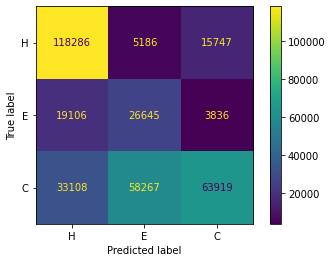

In [ ]:
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy of LSTM prediction:", accuracy_score(ytest_label_letters, ypred_label_letters))

accuracy of LSTM prediction: 0.6069456553327521


# GRU

In [ ]:
seqs[:100].shape

(100, 100, 20)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,GRU,SimpleRNN

In [ ]:
model=Sequential()
model.add(GRU(units=1000,input_shape=(100,20), return_sequences=True))
model.add(Dense(units=3))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
training_size = 6500
xtrain,ytrain=seqs[:training_size],labels[:training_size]
xtest,ytest=seqs[training_size:],labels[training_size:]

In [ ]:
ytest.shape

(3441, 100, 3)

In [ ]:
model.fit(xtrain, ytrain, epochs=1, batch_size=1)
ypred=model.predict(xtest)
# y_test=scaler.inverse_transform(ytest)
# y_pred=scaler.inverse_transform(y_pred)

6500/6500 [==============================] - 266s 41ms/step - loss: 0.1272


In [ ]:
ypred.shape

(3441, 100, 3)

In [ ]:
labels.shape

(9941, 100, 3)

In [ ]:
ypred_label = np.argmax(ypred[:,:,:], axis=2)
ytest_label = np.argmax(ytest[:,:,:], axis=2)

In [ ]:
ypred_label.shape

(3441, 100)

In [ ]:
labels_dict = {0:'H', 1:'E', 2:'C'}

#convert predictions back into letters
ypred_label_letters = []
for i in range(len(ypred_label)):
  final = [labels_dict[letter] for letter in ypred_label[i]]
  ypred_label_letters.append(final)


#convert predictions back into letters
ytest_label_letters = []
for i in range(len(ytest_label)):
  final_test = [labels_dict[letter] for letter in ytest_label[i]]
  ytest_label_letters.append(final_test)

ypred_label_letters

In [ ]:
len(ypred_label_letters[0])
len(ypred_label_letters)

len(ytest_label_letters[0])
len(ytest_label_letters)

3441

In [ ]:
ytest_label_letters = np.array(ytest_label_letters).flatten()
ytest_label_letters

array(['C', 'C', 'E', ..., 'H', 'H', 'H'], dtype='<U1')

In [ ]:
ypred_label_letters = np.array(ypred_label_letters).flatten()
ypred_label_letters

array(['C', 'C', 'C', ..., 'C', 'C', 'C'], dtype='<U1')

In [ ]:
ypred_label_letters.size

344100

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest_label_letters, ypred_label_letters)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['H', 'E', 'C'])

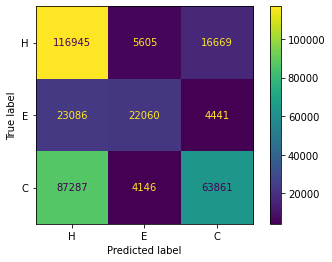

In [ ]:
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy of GRU prediction:", accuracy_score(ytest_label_letters, ypred_label_letters))

accuracy of GRU prediction: 0.5895553618134264


# LSTM-LSTM

In [ ]:
seqs[:100].shape

(100, 100, 20)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,GRU,RNN

In [ ]:
model=Sequential()
model.add(LSTM(units=1000,input_shape=(100,20), return_sequences=True))
model.add(LSTM(units=1000,input_shape=(100,20), return_sequences=True))
model.add(Dense(units=3))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
training_size = 6500
xtrain,ytrain=seqs[:training_size],labels[:training_size]
xtest,ytest=seqs[training_size:],labels[training_size:]

In [ ]:
ytest.shape

(3441, 100, 3)

In [ ]:
model.fit(xtrain, ytrain, epochs=1, batch_size=1)
ypred=model.predict(xtest)
# y_test=scaler.inverse_transform(ytest)
# y_pred=scaler.inverse_transform(y_pred)

6500/6500 [==============================] - 660s 101ms/step - loss: 0.1347


In [ ]:
ypred.shape

In [ ]:
labels.shape

In [ ]:
ypred_label = np.argmax(ypred[:,:,:], axis=2)
ytest_label = np.argmax(ytest[:,:,:], axis=2)

In [ ]:
ypred_label.shape

In [ ]:
labels_dict = {0:'H', 1:'E', 2:'C'}

#convert predictions back into letters
ypred_label_letters = []
for i in range(len(ypred_label)):
  final = [labels_dict[letter] for letter in ypred_label[i]]
  ypred_label_letters.append(final)


#convert predictions back into letters
ytest_label_letters = []
for i in range(len(ytest_label)):
  final_test = [labels_dict[letter] for letter in ytest_label[i]]
  ytest_label_letters.append(final_test)

ypred_label_letters

In [ ]:
len(ypred_label_letters[0])
len(ypred_label_letters)

len(ytest_label_letters[0])
len(ytest_label_letters)

In [ ]:
ytest_label_letters = np.array(ytest_label_letters).flatten()
ytest_label_letters

In [ ]:
ypred_label_letters = np.array(ypred_label_letters).flatten()
ypred_label_letters

In [ ]:
ypred_label_letters.size

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest_label_letters, ypred_label_letters)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['H', 'E', 'C'])

In [ ]:
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy of LSTM-LSTM prediction:", accuracy_score(ytest_label_letters, ypred_label_letters))

# LSTM-GRU

In [ ]:
seqs[:100].shape

(100, 100, 20)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,GRU,RNN

In [ ]:
model=Sequential()
model.add(LSTM(units=1000,input_shape=(100,20), return_sequences=True))
model.add(GRU(units=1000,input_shape=(100,20), return_sequences=True))
model.add(Dense(units=3))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
training_size = 6500
xtrain,ytrain=seqs[:training_size],labels[:training_size]
xtest,ytest=seqs[training_size:],labels[training_size:]

In [ ]:
ytest.shape

(3441, 100, 3)

In [ ]:
model.fit(xtrain, ytrain, epochs=1, batch_size=1)
ypred=model.predict(xtest)
# y_test=scaler.inverse_transform(ytest)
# y_pred=scaler.inverse_transform(y_pred)

4579/6500 [====================>.........] - ETA: 2:55 - loss: 0.1389

In [ ]:
ypred.shape

In [ ]:
labels.shape

In [ ]:
ypred_label = np.argmax(ypred[:,:,:], axis=2)
ytest_label = np.argmax(ytest[:,:,:], axis=2)

In [ ]:
ypred_label.shape

In [ ]:
labels_dict = {0:'H', 1:'E', 2:'C'}

#convert predictions back into letters
ypred_label_letters = []
for i in range(len(ypred_label)):
  final = [labels_dict[letter] for letter in ypred_label[i]]
  ypred_label_letters.append(final)


#convert predictions back into letters
ytest_label_letters = []
for i in range(len(ytest_label)):
  final_test = [labels_dict[letter] for letter in ytest_label[i]]
  ytest_label_letters.append(final_test)

ypred_label_letters

In [ ]:
len(ypred_label_letters[0])
len(ypred_label_letters)

len(ytest_label_letters[0])
len(ytest_label_letters)

In [ ]:
ytest_label_letters = np.array(ytest_label_letters).flatten()
ytest_label_letters

In [ ]:
ypred_label_letters = np.array(ypred_label_letters).flatten()
ypred_label_letters

In [ ]:
ypred_label_letters.size

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest_label_letters, ypred_label_letters)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['H', 'E', 'C'])

In [ ]:
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy of LSTM-GRU prediction:", accuracy_score(ytest_label_letters, ypred_label_letters))

# GRU-GRU

In [ ]:
seqs[:100].shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,GRU,RNN

In [ ]:
model=Sequential()
model.add(GRU(units=1000,input_shape=(100,20), return_sequences=True))
model.add(GRU(units=1000,input_shape=(100,20), return_sequences=True))
model.add(Dense(units=3))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
training_size = 6500
xtrain,ytrain=seqs[:training_size],labels[:training_size]
xtest,ytest=seqs[training_size:],labels[training_size:]

In [ ]:
ytest.shape

In [ ]:
model.fit(xtrain, ytrain, epochs=1, batch_size=1)
ypred=model.predict(xtest)
# y_test=scaler.inverse_transform(ytest)
# y_pred=scaler.inverse_transform(y_pred)

In [ ]:
ypred.shape

In [ ]:
labels.shape

In [ ]:
ypred_label = np.argmax(ypred[:,:,:], axis=2)
ytest_label = np.argmax(ytest[:,:,:], axis=2)

In [ ]:
ypred_label.shape

In [ ]:
labels_dict = {0:'H', 1:'E', 2:'C'}

#convert predictions back into letters
ypred_label_letters = []
for i in range(len(ypred_label)):
  final = [labels_dict[letter] for letter in ypred_label[i]]
  ypred_label_letters.append(final)


#convert predictions back into letters
ytest_label_letters = []
for i in range(len(ytest_label)):
  final_test = [labels_dict[letter] for letter in ytest_label[i]]
  ytest_label_letters.append(final_test)

ypred_label_letters

In [ ]:
len(ypred_label_letters[0])
len(ypred_label_letters)

len(ytest_label_letters[0])
len(ytest_label_letters)

In [ ]:
ytest_label_letters = np.array(ytest_label_letters).flatten()
ytest_label_letters

In [ ]:
ypred_label_letters = np.array(ypred_label_letters).flatten()
ypred_label_letters

In [ ]:
ypred_label_letters.size

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest_label_letters, ypred_label_letters)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['H', 'E', 'C'])

In [ ]:
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy of GRU-GRU prediction:", accuracy_score(ytest_label_letters, ypred_label_letters))

# Bidirectional LSTM-LSTM

In [ ]:
seqs[:100].shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,GRU,SimpleRNN, Bidirectional, Activation

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units=1000, return_sequences=True), input_shape=(100, 20)))
model.add(Bidirectional(LSTM(units=1000, return_sequences=True), input_shape=(100, 20)))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [ ]:
training_size = 6500
xtrain,ytrain=seqs[:training_size],labels[:training_size]
xtest,ytest=seqs[training_size:],labels[training_size:]

In [ ]:
ytest.shape

In [ ]:
model.fit(xtrain, ytrain, epochs=1, batch_size=1)
ypred=model.predict(xtest)
# y_test=scaler.inverse_transform(ytest)
# y_pred=scaler.inverse_transform(y_pred)

In [ ]:
ypred.shape

In [ ]:
labels.shape

In [ ]:
ypred_label = np.argmax(ypred[:,:,:], axis=2)
ytest_label = np.argmax(ytest[:,:,:], axis=2)

In [ ]:
ypred_label.shape

In [ ]:
labels_dict = {0:'H', 1:'E', 2:'C'}

#convert predictions back into letters
ypred_label_letters = []
for i in range(len(ypred_label)):
  final = [labels_dict[letter] for letter in ypred_label[i]]
  ypred_label_letters.append(final)


#convert predictions back into letters
ytest_label_letters = []
for i in range(len(ytest_label)):
  final_test = [labels_dict[letter] for letter in ytest_label[i]]
  ytest_label_letters.append(final_test)

ypred_label_letters

In [ ]:
len(ypred_label_letters[0])
len(ypred_label_letters)

len(ytest_label_letters[0])
len(ytest_label_letters)

In [ ]:
ytest_label_letters = np.array(ytest_label_letters).flatten()
ytest_label_letters

In [ ]:
ypred_label_letters = np.array(ypred_label_letters).flatten()
ypred_label_letters

In [ ]:
ypred_label_letters.size

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest_label_letters, ypred_label_letters)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['H', 'E', 'C'])

In [ ]:
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy of Bidirectional LSTM-LSTM prediction:", accuracy_score(ytest_label_letters, ypred_label_letters))